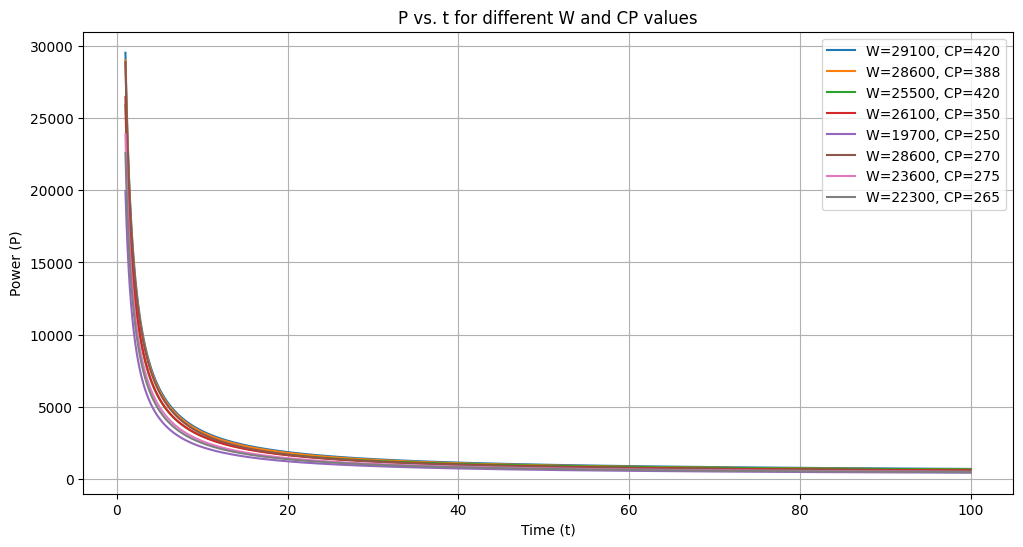

In [316]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv('2024_pursuit_data.csv')
work = data['W']
CP = data['CP']
Pmax = data['Pmax']
CdA = data['CdA']

t = np.linspace(1, 100, 100000)  

# Plot P for each W, CP pair
plt.figure(figsize=(12, 6))
for w, cp in zip(work, CP):
    P = w / t + cp
    plt.plot(t, P, label=f'W={w}, CP={cp}')

plt.xlabel('Time (t)')
plt.ylabel('Power (P)')
plt.title('P vs. t for different W and CP values')
plt.legend()
plt.grid(True)
plt.show()



# Part 1

   Rider  Time (s)
0      0     198.2
1      1     200.8
2      2     195.7
3      3     197.6
4      4     214.0
5      5     200.6
6      6     211.1
7      7     215.2


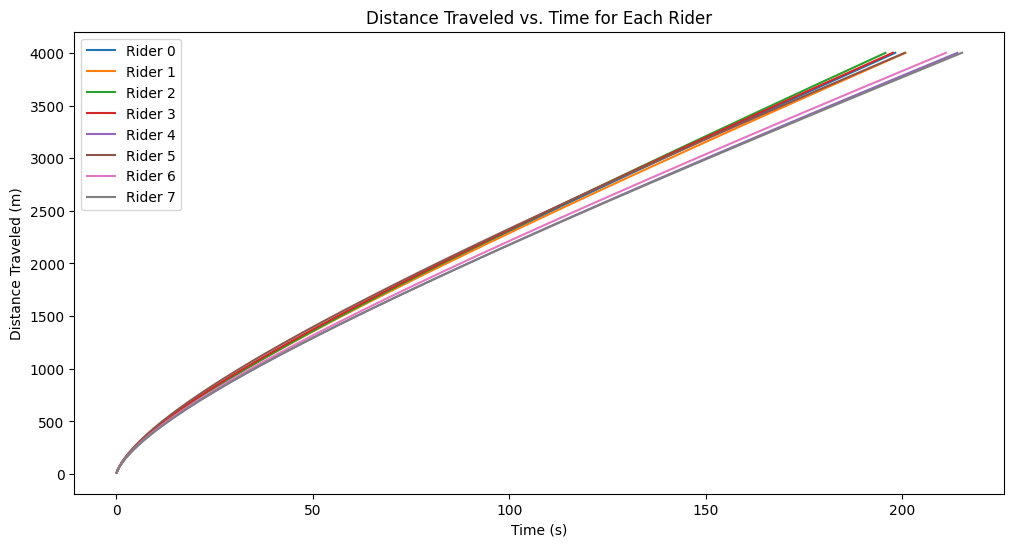

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

rho = 1.225  # Air density (kg/m³)
distance = 4000  # Race distance (meters)
time_step = 0.1  # Time step (seconds)

def power(W, t, CP):
    return W / t + CP

def velocity(rho, P, CdA):
    return ((2 * P) / (rho * CdA)) ** (1 / 3)

results = []


plt.figure(figsize=(12, 6))  

for index, row in data.iterrows():
    W = row['W']
    CP = row['CP']
    CdA = row['CdA']

    distance_traveled = 0
    total_time = 0  

    time = []  
    distance_list = []  

    while distance_traveled < distance:
        P = power(W, total_time + time_step, CP)  
        v = velocity(rho, P, CdA) 
        distance_traveled += v * time_step  
        total_time += time_step  
        time.append(total_time)
        distance_list.append(distance_traveled)

    results.append({'Rider': index, 'Time (s)': round(total_time, 2)})


    plt.plot(time, distance_list, label=f'Rider {index}')

results_df = pd.DataFrame(results)
print(results_df)


plt.xlabel('Time (s)')
plt.ylabel('Distance Traveled (m)')
plt.title('Distance Traveled vs. Time for Each Rider')
plt.legend()  

plt.show()


# Part 2

In this implementation, we set up an array of lead times for the first rider, from 0-220 seconds. This represents the time that rider 1 leads before the switch. we then grab the data for the 2 riders. we then simulate races by looking at every possible lead time for the first rider, then calculating this rider's power as time passes and thus their velocity, and therefore how long it takes for them to finish the race. once the lead time is passed, the riders switch, with the second rider starting with their power being as if they were at t = 0, since the lack of drag means they can easily pursue. then the same steps (calculate power, velocity, time) are calculated and the amount of time it takes is the sum of the time spent with rider 1 in front and rider 2 in front. 


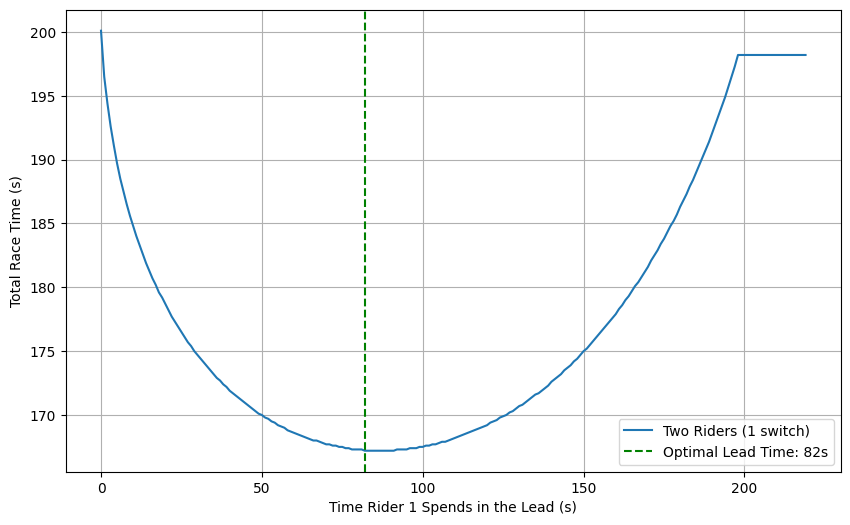

Min race time: 167.19999999999905 s
Optimal lead time: 82 s


In [318]:
rho = 1.225  # Air density (kg/m³)
distance = 4000  # Race distance (meters)
time_step = 0.1  # Time step (seconds)

def power(W, t, CP):
    return W / (t) + CP  

def velocity(rho, P, CdA):
    return ((2 * P) / (rho * CdA)) ** (1 / 3)

rider1 = data.iloc[0]
rider2 = data.iloc[1]
W1, CP1, CdA1 = rider1['W'], rider1['CP'], rider1['CdA']
W2, CP2, CdA2 = rider2['W'], rider2['CP'], rider2['CdA']

lead_times = np.arange(0, 220, 1)
race_times = []

for lead_time in lead_times:
    distance_traveled = 0  
    rider1_time = 0  
    rider2_time = 0  
    total_time = 0  
    lead_rider = 1  

    while distance_traveled < distance:
        if lead_rider == 1:
            # Rider 1 is leading before the switch
            rider1_time += time_step
            rider1_power = power(W1, rider1_time, CP1)
            rider1_velocity = velocity(rho, rider1_power, CdA1)
            distance_traveled += rider1_velocity * time_step
            if rider1_time >= lead_time:  # Switch happens when Rider 1 finishes their lead time
                lead_rider = 2  # Switch to Rider 2
        else:
            # Rider 2 is leading after the switch
            rider2_time += time_step
            rider2_power = power(W2, rider2_time, CP2)
            rider2_velocity = velocity(rho, rider2_power, CdA2)
            distance_traveled += rider2_velocity * time_step
        
    # Add up the times
    total_time = rider1_time + rider2_time
    race_times.append(total_time)

# Find the minimum race time and optimal lead time
min_race_time = min(race_times)
optimal_lead_time = lead_times[np.argmin(race_times)]

plt.figure(figsize=(10, 6))
plt.plot(lead_times, race_times, label="Two Riders (1 switch)")
plt.axvline(x=optimal_lead_time, color='g', linestyle='--', label=f"Optimal Lead Time: {optimal_lead_time}s")
plt.xlabel("Time Rider 1 Spends in the Lead (s)")
plt.ylabel("Total Race Time (s)")
plt.legend()
plt.grid(True)
plt.show()

print("Min race time:", min_race_time,'s')
print("Optimal lead time:", optimal_lead_time,'s')


# Part 3
This is follows the exact same logic as part 2, except with three riders instead of two. We follow the same lead time logic, except iterating over two lead time arrays for the two riders. 

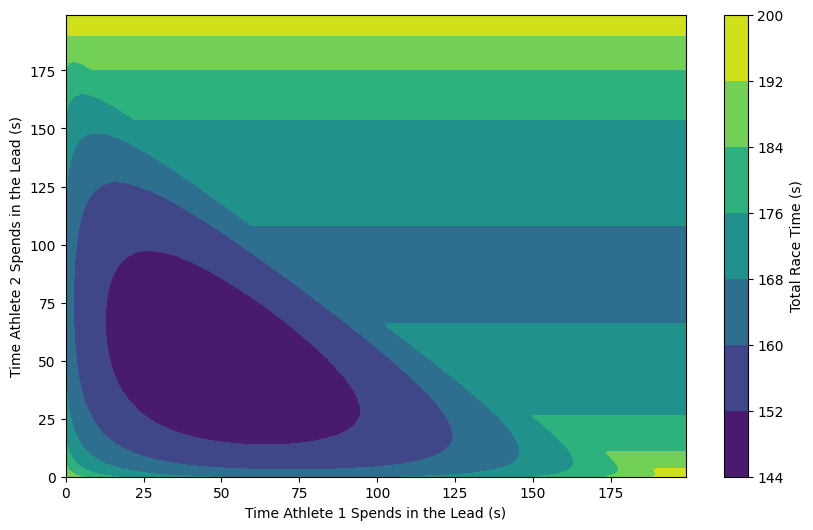

Min race time 146.40000000000128
Optimal Rider 1 Lead (s) 46
Optimal Rider 2 Lead (s) 47


In [319]:
rho = 1.225  # Air density (kg/m³)
distance = 4000  # Race distance (meters)
time_step = 0.1  # Time step (seconds)

def power(W, t, CP):
    return W / (t) + CP  

def velocity(rho, P, CdA):
    return ((2 * P) / (rho * CdA)) ** (1 / 3)  # Calculate velocity from power

rider1 = data.iloc[0]
rider2 = data.iloc[1]
rider3 = data.iloc[2]

W1, CP1, CdA1 = rider1['W'], rider1['CP'], rider1['CdA']
W2, CP2, CdA2 = rider2['W'], rider2['CP'], rider2['CdA']
W3, CP3, CdA3 = rider3['W'], rider3['CP'], rider3['CdA']

lead_times_1 = np.arange(0, 200, 1)
lead_times_2 = np.arange(0, 200, 1)

race_times = np.zeros((len(lead_times_1), len(lead_times_2)))


for i, lead_time_1 in enumerate(lead_times_1):
    for j, lead_time_2 in enumerate(lead_times_2):
        distance_traveled = 0 
        rider1_time = 0  
        rider2_time = 0  
        rider3_time = 0  
        total_time = 0  
        lead_rider = 1  

        while distance_traveled < distance:
            if lead_rider == 1:
                # Rider 1 is leading before the switch
                rider1_time += time_step
                rider1_power = power(W1, rider1_time, CP1)
                rider1_velocity = velocity(rho, rider1_power, CdA1)
                distance_traveled += rider1_velocity * time_step
                if rider1_time >= lead_time_1:  
                    lead_rider = 2  
            elif lead_rider == 2:
                # Rider 2 is leading before the switch
                rider2_time += time_step
                rider2_power = power(W2, rider2_time, CP2)
                rider2_velocity = velocity(rho, rider2_power, CdA2)
                distance_traveled += rider2_velocity * time_step
                if rider2_time >= lead_time_2:  
                    lead_rider = 3  
            else:
                # Rider 3 is leading after the switch
                rider3_time += time_step
                rider3_power = power(W3, rider3_time, CP3)
                rider3_velocity = velocity(rho, rider3_power, CdA3)
                distance_traveled += rider3_velocity * time_step

        
        total_time = rider1_time + rider2_time + rider3_time
        race_times[i, j] = total_time

plt.figure(figsize=(10, 6))
cp = plt.contourf(lead_times_1, lead_times_2, race_times)
plt.colorbar(cp, label="Total Race Time (s)")
plt.xlabel("Time Athlete 1 Spends in the Lead (s)")
plt.ylabel("Time Athlete 2 Spends in the Lead (s)")
plt.show()

min_race_time = np.min(race_times)
min_indices = np.unravel_index(np.argmin(race_times), race_times.shape)
optimal_lead_time_1 = lead_times_1[min_indices[0]]
optimal_lead_time_2 = lead_times_2[min_indices[1]]

print('Min race time', min_race_time)
print('Optimal Rider 1 Lead (s)', optimal_lead_time_1)
print('Optimal Rider 2 Lead (s)', optimal_lead_time_2)


